## BQSKit Software Tutorial
Stands for Berkeley Quantum Synthesis Toolkit, BQSKit (pronounced "biscuit") is an open-source, fully portable compiler framework for quantum circuit synthesis, gate-set transpilation, and global circuit optimization. BQSKit also supports techniques for mapping circuits onto physical machines with any topology. Under the hood, BQSkit defines its own intermediate representation (IR) and compiler infrastructure for circuit compilation.

In this tutorial, we will cover the following basic topics on BQSKit
1. Circuit construction
2. Circuit compilation
3. Custom compilation workflow

You will need the following packages installed via ```pip```: ```qiskit, bqskit```. Alternatively, you can install the necessary packages in ```requirements.txt``` with ```pip install -r requirements.txt```.

### Section 1. Circuit Construction
To construct a circuit in BQSKit, we first create a Circuit object, specifying the number of logical qubits in the circuit. Following the Circuit instantiation, we can add gates to the circuit via the ```append_gate``` method. Below, depicts the creation of a 3-qubit GHZ state.

In [1]:
from bqskit import Circuit
from bqskit.ir.gates import HGate, CXGate

# Create BQSKit Circuit object
circuit = Circuit(num_qudits=3) 

# Insert gates to entangle 3 qubits (GHZ state)
circuit.append_gate(HGate(), 0)
circuit.append_gate(CXGate(), (0,1))
circuit.append_gate(CXGate(), (1,2))

# Print resulting unitary and result given state vector
print("Circuit Unitary: \n", circuit.get_unitary())
print("Resulting output state: \n", circuit.get_statevector([1,0,0,0,0,0,0,0]))

Circuit Unitary: 
 [[ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.        +0.j  0.        +0.j 

We can also import circuits from either ```.qasm``` files or from other libraries like ```Qiskit```. Below shows a QFT circuit from ```Qiskit``` which is imported into BQSKit using the ```qiskit_to_bqskit``` function. We can see the various circuit attributes of the imported circuit such as ```gate_counts``` and ```coupling_graph```. The coupling graph is the logical connection of the circuit. 

In [2]:
# 20-qubit QFT circuit from Qiskit
from qiskit.circuit.library.basis_change.qft import QFT
qiskit_qft_circ = QFT(num_qubits=10).decompose()
qiskit_qft_circ.draw()

# Import QFT circuit into BQSKit
from bqskit.ext import qiskit_to_bqskit
bqskit_qft_circ = qiskit_to_bqskit(qiskit_qft_circ)

# Output relevant circuit info
print("20-qubit FFT gate counts: ", bqskit_qft_circ.gate_counts)
print("20-qubit FFT coupling graph: ", bqskit_qft_circ.coupling_graph)

20-qubit FFT gate counts:  {CPGate: 45, SwapGate: 5, HGate: 10}
20-qubit FFT coupling graph:  CouplingGraph({(3, 4), (4, 9), (3, 7), (4, 6), (5, 7), (0, 2), (8, 9), (0, 5), (1, 6), (0, 8), (2, 5), (1, 3), (1, 9), (2, 8), (6, 8), (4, 5), (3, 9), (5, 6), (4, 8), (3, 6), (5, 9), (0, 1), (0, 7), (2, 4), (1, 2), (0, 4), (2, 7), (1, 5), (1, 8), (7, 9), (6, 7), (4, 7), (3, 5), (3, 8), (5, 8), (0, 3), (0, 9), (1, 4), (0, 6), (2, 3), (2, 9), (1, 7), (2, 6), (6, 9), (7, 8)})


### Section 2. Circuit Compilation
The simplest way to compile a circuit in BQSKit is using the ```compile``` function. After the simple compilation, we can see that the circuit is now constructed using many more general rotation gates and CNOT gates. 

In [3]:
qft_circ = bqskit_qft_circ

# Compile the QFT circuit
from bqskit import compile
compiled_circ = compile(qft_circ)

# Output original and compiled circuit info
print("Original gate counts: ", qft_circ.gate_counts)
print("Compiled gate counts: ", compiled_circ.gate_counts)
print("Compiled coupling graph: ", compiled_circ.coupling_graph)

Original gate counts:  {CPGate: 45, SwapGate: 5, HGate: 10}
Compiled gate counts:  {CNOTGate: 106, U3Gate: 281}
Compiled coupling graph:  CouplingGraph({(3, 4), (4, 9), (3, 7), (4, 6), (5, 7), (0, 2), (8, 9), (0, 5), (1, 6), (0, 8), (2, 5), (1, 3), (1, 9), (2, 8), (6, 8), (4, 5), (3, 9), (5, 6), (4, 8), (3, 6), (5, 9), (0, 1), (0, 7), (2, 4), (1, 2), (0, 4), (2, 7), (1, 5), (1, 8), (7, 9), (6, 7), (4, 7), (3, 5), (3, 8), (5, 8), (0, 3), (0, 9), (1, 4), (0, 6), (2, 3), (2, 9), (1, 7), (2, 6), (6, 9), (7, 8)})


#### Section 2.1. Customizing Machine Models
By default, BQSKit assumes an all-to-all machine topology and a native gate set comprised of CNOT and U3 gates. To customize the circuit compilation to a specific machine model, we can create a ```MachineModel``` object with the machine-specific gate set and machine coupling graph. BQSKit also has a variety of built-in machine models that are ready to use.

In [4]:
# Specify custom gate set and machine coupling graph
from bqskit.ir.gates import CZGate, RZGate, XGate, SXGate
n_qubits = 20
gate_set = {CZGate(), RZGate(), XGate(), SXGate()}
coupling_graph = [
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9, 10),
    (10,11), (11,12), (12,13), (13,14), (14,15), (15,16), (16,17), (17,18), (18,19)
] # linear topology

# Create machine model
from bqskit import MachineModel
model = MachineModel(n_qubits, gate_set=gate_set, coupling_graph=coupling_graph)

# Compile version of circuit
compiled_circ = compile(qft_circ, model=model)

# Output compiled circuit info
print("Compiled gate counts on custom machine: ", compiled_circ.gate_counts)
print("Compiled coupling graph on custom machine: ", compiled_circ.coupling_graph)

Compiled gate counts on custom machine:  {SqrtXGate: 1164, RZGate: 1746, CZGate: 286}
Compiled coupling graph on custom machine:  CouplingGraph({(9, 10), (1, 2), (3, 4), (2, 3), (6, 7), (4, 5), (8, 9), (5, 6), (7, 8)})


In [5]:
# Converting Qiskit backend to be used in BQSkit
from bqskit.ext import model_from_backend
from qiskit.providers.fake_provider import Fake20QV1

# Get Qiskit ibm_kyoto backend
backend = Fake20QV1()

# Convert backend to BQSkit machine model
model = model_from_backend(backend=backend)

# Output machine model
print("Machine gate set: ", model.gate_set)
print('''Machine coupling map: \n 
00 ↔ 01 ↔ 02 ↔ 03 ↔ 04
      ↕         ↕
05 ↔ 06 ↔ 07 ↔ 08 ↔ 09
 ↕         ↕         ↕
10 ↔ 11 ↔ 12 ↔ 13 ↔ 14
      ↕         ↕
15 ↔ 16 ↔ 17 ↔ 18 ↔ 19
''')

# Compile version of circuit
compiled_circ = compile(qft_circ, model=model)

# Output compiled circuit info
print("Compiled gate counts on fake IBM Backend: ", compiled_circ.gate_counts)
print("Compiled coupling graph on fake IBM Backend: ", compiled_circ.coupling_graph)

Machine gate set:  GateSet({U1Gate, CNOTGate, U2Gate, U3Gate})
Machine coupling map: 
 
00 ↔ 01 ↔ 02 ↔ 03 ↔ 04
      ↕         ↕
05 ↔ 06 ↔ 07 ↔ 08 ↔ 09
 ↕         ↕         ↕
10 ↔ 11 ↔ 12 ↔ 13 ↔ 14
      ↕         ↕
15 ↔ 16 ↔ 17 ↔ 18 ↔ 19

Compiled gate counts on fake IBM Backend:  {CNOTGate: 224, U3Gate: 567}
Compiled coupling graph on fake IBM Backend:  CouplingGraph({(3, 8), (1, 2), (11, 16), (12, 13), (11, 12), (6, 7), (2, 3), (7, 12), (1, 6), (7, 8)})


#### Section 2.2. Compilation Optimization
There are four levels of optimization for compiling circuits - 1, 2, 3, and 4. Level 1 optimization is for compiling circuits as quickly as possible. Optimization levels 2 and 3 try to reduce the number of gates used further while trading off compile time. Level 4 optimization is for compiling the circuit that uses the fewest number of gates possible. The default level is 1. Shown below are the compiled results and times (in seconds) of all four optimization levels.

In [6]:
from timeit import default_timer as timer

# Level 1 
start = timer()
compiled_circ = compile(qft_circ, optimization_level=1)
end = timer()
print("Level 1 compiled gate counts: ", compiled_circ.gate_counts)
print("Compilation time: ", end - start, " seconds\n")

# Level 2
start = timer()
compiled_circ = compile(qft_circ, optimization_level=2)
end = timer()
print("Level 2 compiled gate counts: ", compiled_circ.gate_counts)
print("Compilation time: ", end - start, " seconds\n")

# Level 3
start = timer()
compiled_circ = compile(qft_circ, optimization_level=3)
end = timer()
print("Level 3 compiled gate counts: ", compiled_circ.gate_counts)
print("Compilation time: ", end - start, " seconds\n")

# Level 4 (Commented out since takes too long)
# start = timer()
# compiled_circ = compile(qft_circ, optimization_level=4)
# end = timer()
# print("Level 4 compiled gate counts: ", compiled_circ.gate_counts)
# print("Compilation time: ", end - start, " seconds\n")


Level 1 compiled gate counts:  {CNOTGate: 105, U3Gate: 275}
Compilation time:  4.812772154999948  seconds

Level 2 compiled gate counts:  {CNOTGate: 105, U3Gate: 155}
Compilation time:  11.570793627000057  seconds

Level 3 compiled gate counts:  {CNOTGate: 105, U3Gate: 130}
Compilation time:  99.77751051300038  seconds



#### Section 2.3. Circuit Synthesis
Circuits in BQSKit can be built by first breaking the original circuit up into blocks as shown in the figure below. Based on the gates within each block, a target unitary matrix is computed. During circuit synthesis, the numerical optimizer or search algorithm will add gates (of the machine set) sequentially to synthesize a block with a similar unitary (synthesized unitary) as the original block. To characterize the difference between the reference and synthesized unitary matrices, the Hilber-Schmidt inner product is used as the distance function [1] between the target and synthesized unitaries. The search algorithm runs until a distance metric of less than $\epsilon$ is achieved.

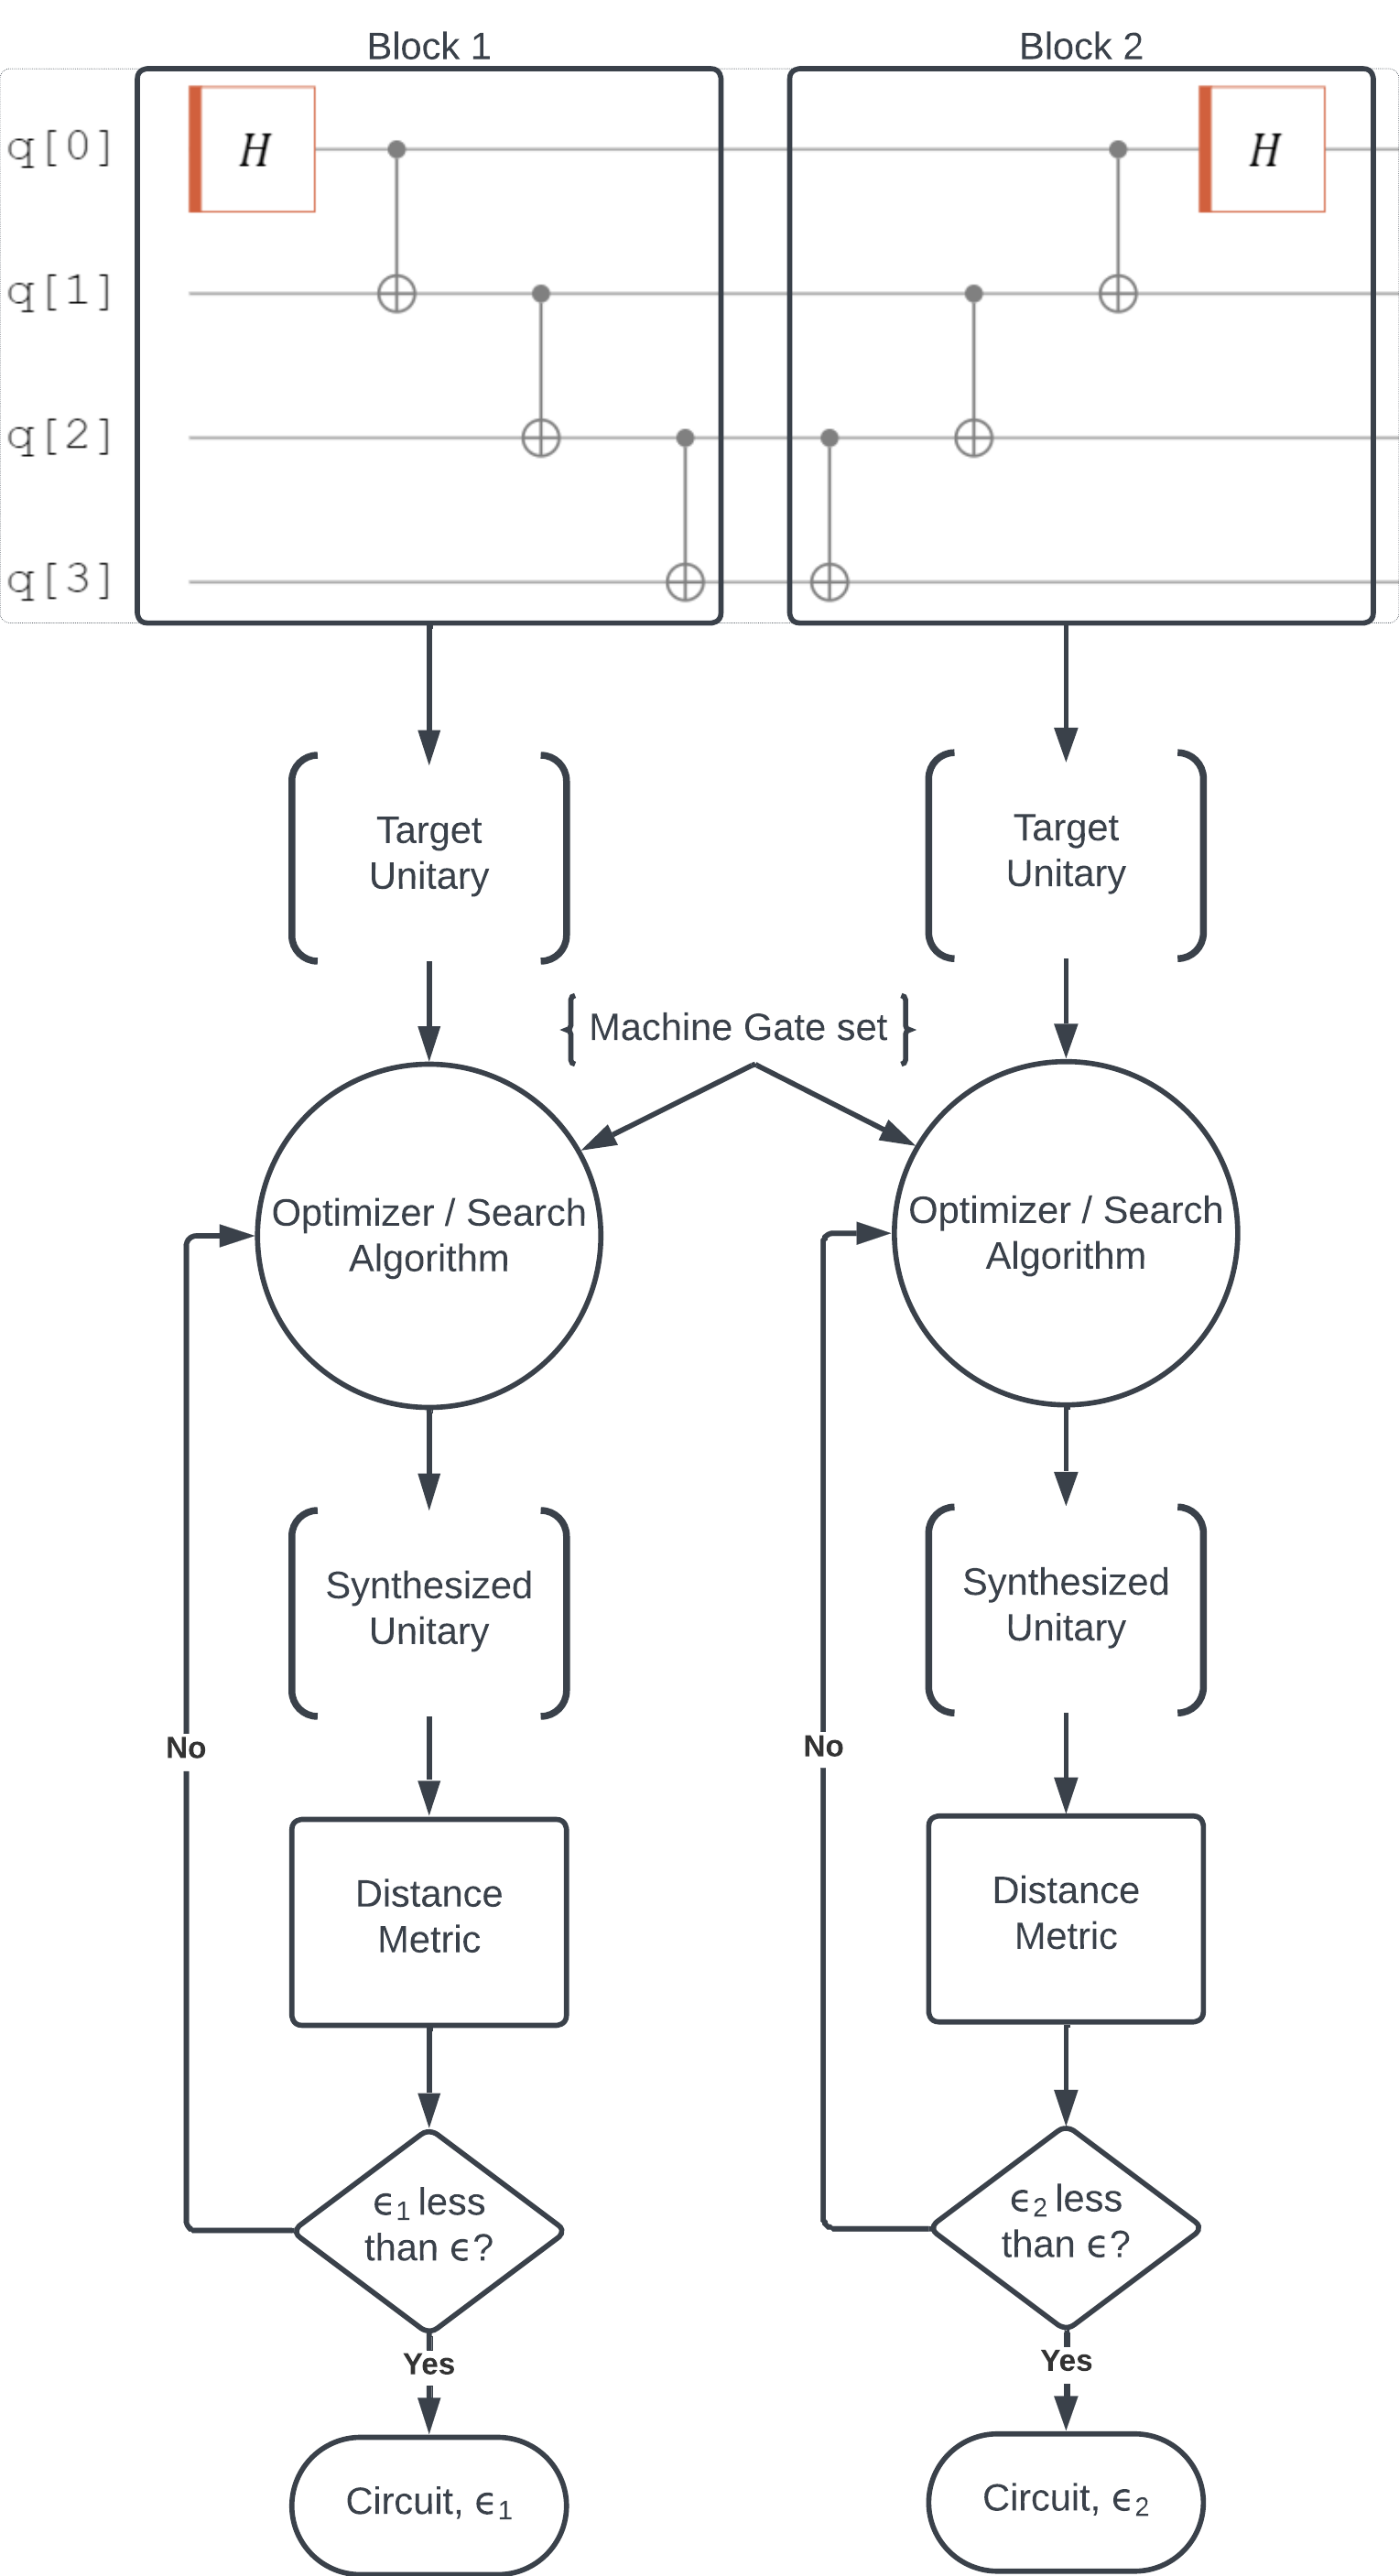

To specify the maximum width of each block during synthesis, use the ```max_synthesis_size``` argument. Ideally, to get the best results, we would want to run circuit synthesis on the entire circuit. However, for larger circuits, this quickly becomes infeasible. The default width of each block is 3.

In [7]:
out_circuit = compile(qft_circ, max_synthesis_size=2)
print("Gate Counts:", out_circuit.gate_counts)

Gate Counts: {CNOTGate: 105, U3Gate: 300}


To specify the maximum error tolerance $\epsilon$ for each block, use the ```synthesis_epsilon``` argument. The default value for $\epsilon$ is 1e-8. 

In [8]:
out_circuit = compile(qft_circ, synthesis_epsilon=1e-2)
print("Gate Counts:", out_circuit.gate_counts)

Gate Counts: {CNOTGate: 105, U3Gate: 278}


### Section 3. Custom Compilation Workflow
In BQSKit, a workflow is a list of compilation passes that are executed in order. The ```compile()``` function from Section 2 implicitly uses workflows to compile circuits. Shown below are the default workflows at different optimization levels. As the optimization level increases, different passes are used. For more details about specific passes, see the documentation in [2].

In [9]:
from bqskit.compiler.compile import build_workflow

default_wkflow = build_workflow(qft_circ, optimization_level=1)
print("Default optimization 1 workflow:")
print(default_wkflow)
print()

default_wkflow = build_workflow(qft_circ, optimization_level=2)
print("Default optimization 2 workflow:")
print(default_wkflow)
print()

default_wkflow = build_workflow(qft_circ, optimization_level=3)
print("Default optimization 3 workflow:")
print(default_wkflow)
print()

default_wkflow = build_workflow(qft_circ, optimization_level=4)
print("Default optimization 4 workflow:")
print(default_wkflow)
print()

Default optimization 1 workflow:
Workflow: Off-the-Shelf Circuit Compilation
	0. Workflow: UnfoldPass
	1. Workflow: ExtractMeasurements
	2. Workflow: SetModelPass
	3. Workflow: Multi Qudit Retargeting
	4. Workflow: SABRE Mapping
	5. Workflow: Multi Qudit Retargeting
	6. Workflow: Single Qudit Retargeting
	7. Workflow: LogErrorPass
	8. Workflow: ApplyPlacement
	9. Workflow: RestoreMeasurements

Default optimization 2 workflow:
Workflow: Off-the-Shelf Circuit Compilation
	0. Workflow: UnfoldPass
	1. Workflow: ExtractMeasurements
	2. Workflow: SetModelPass
	3. Workflow: Multi Qudit Retargeting
	4. Workflow: SABRE Mapping
	5. Workflow: Multi Qudit Retargeting
	6. Workflow: Single Qudit Retargeting
	7. Workflow: Gate Deletion Optimization
	8. Workflow: LogErrorPass
	9. Workflow: ApplyPlacement
	10. Workflow: RestoreMeasurements

Default optimization 3 workflow:
Workflow: Off-the-Shelf Circuit Compilation
	0. Workflow: UnfoldPass
	1. Workflow: ExtractMeasurements
	2. Workflow: SetModelPass
	

#### Section 3.1. Constructing Custom Workflows
To construct a custom workflow, create a ```Workflow``` object with a list of passes. Then create a ```Compiler``` object with the workflow specified to compile the original circuit.

In [10]:
from bqskit.compiler import Workflow, Compiler
from bqskit.passes.mapping.setmodel import SetModelPass
from bqskit.passes import *


n_qubits = 20
coupling_graph = [
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9, 10),
    (10,11), (11,12), (12,13), (13,14), (14,15), (15,16), (16,17), (17,18), (18,19)
]
model = MachineModel(n_qubits, coupling_graph=coupling_graph)

# Create Workflow with a list of passes
custom_leap_workflow = Workflow([
    SetModelPass(model),
    GeneralizedSabreLayoutPass(),
    GeneralizedSabreRoutingPass(),
    ApplyPlacement(),
    QuickPartitioner(),    
    ForEachBlockPass([
        LEAPSynthesisPass()
    ]),
    UnfoldPass()
])

custom_qstar_workflow = Workflow([
    SetModelPass(model),
    GeneralizedSabreLayoutPass(),
    GeneralizedSabreRoutingPass(),
    ApplyPlacement(),
    QuickPartitioner(),    
    ForEachBlockPass([
        QSearchSynthesisPass()
    ]),
    UnfoldPass()
])

# Create Compiler object and pass in custom workflow
with Compiler() as compiler:
    print(custom_leap_workflow)
    compiled_circ = compiler.compile(qft_circ, workflow=custom_leap_workflow)
    print("Gate Counts with LEAP:", compiled_circ.gate_counts)
    print("Coupling Graph with LEAP: ", compiled_circ.coupling_graph)
    print()

with Compiler() as compiler:
    print(custom_qstar_workflow)
    compiled_circ = compiler.compile(qft_circ, workflow=custom_qstar_workflow)
    print("Gate Counts with Q*:", compiled_circ.gate_counts)
    print("Coupling Graph with Q*: ", compiled_circ.coupling_graph)
    print()



Workflow: Workflow
	0. Workflow: SetModelPass
	1. Workflow: GeneralizedSabreLayoutPass
	2. Workflow: GeneralizedSabreRoutingPass
	3. Workflow: ApplyPlacement
	4. Workflow: QuickPartitioner
	5. Workflow: ForEachBlockPass
	6. Workflow: UnfoldPass
Gate Counts with LEAP: {RZGate: 283, RYGate: 566, RXGate: 283, CNOTGate: 283, U3Gate: 120}
Coupling Graph with LEAP:  CouplingGraph({(0, 1), (1, 2), (3, 4), (2, 3), (6, 7), (4, 5), (8, 9), (5, 6), (7, 8)})

Workflow: Workflow
	0. Workflow: SetModelPass
	1. Workflow: GeneralizedSabreLayoutPass
	2. Workflow: GeneralizedSabreRoutingPass
	3. Workflow: ApplyPlacement
	4. Workflow: QuickPartitioner
	5. Workflow: ForEachBlockPass
	6. Workflow: UnfoldPass
Gate Counts with Q*: {RZGate: 261, RYGate: 522, RXGate: 261, CNOTGate: 261, U3Gate: 120}
Coupling Graph with Q*:  CouplingGraph({(0, 1), (1, 2), (3, 4), (2, 3), (6, 7), (4, 5), (8, 9), (5, 6), (7, 8)})



#### 3.2. Creating a Custom Pass
To create a custom pass, create a new class that inherits from ```BasePass```  in BQSKit. Then implement an asynchronous method named ```run()``` that executes the path. The ```run()``` method will accept a ```Circuit``` and ```PassData``` as arguments. The ```Circuit``` object is the circuit we want to run the pass on. The pass can analyze and modify the circuit. The ```PassData``` object is a dictionary accessible by all passes. It can be used to send data between different passes. It is important that the ```run()``` method is self-contained and does not modify the class. More information about creating custom passes can be found in [3].

Below is an example of a custom pass that prints the number of gates in the circuit.
```
from bqskit.compiler import BasePass, PassData
from bqskit import Circuit

class PrintGatesPass(BasePass):
    async def run(self, circuit: Circuit, data: PassData) -> None:
        print(circuit.gate_counts)
```
Note that this code is stored in a separate file, which is needed for the BQSKit runtime.

In [11]:
from PrintGatesPass import PrintGatesPass

workflow = Workflow([
    SetModelPass(model),
    QuickPartitioner(),
    ForEachBlockPass([
        PrintGatesPass()
    ]),
    UnfoldPass()
])

with Compiler() as compiler:
    compiled_circ = compiler.compile(qft_circ, workflow=workflow)

{CPGate: 2, HGate: 1}
{CPGate: 2}
{CPGate: 1, SwapGate: 1}
{CPGate: 2}
{CPGate: 2}
{CPGate: 1, HGate: 1}
{CPGate: 1, SwapGate: 1}
{CPGate: 2}
{CPGate: 2}
{CPGate: 2}
{SwapGate: 1}
{CPGate: 1}
{CPGate: 1}
{SwapGate: 1}
{CPGate: 1}
{CPGate: 2}
{CPGate: 2}
{CPGate: 2}
{CPGate: 3, HGate: 2}
{CPGate: 3, HGate: 2}
{CPGate: 2}
{CPGate: 2}
{HGate: 1, SwapGate: 1, CPGate: 1}
{HGate: 3, CPGate: 3}
{CPGate: 2}
{CPGate: 1}
{CPGate: 2}


### Appendix: Running BQSKit on Clusters
Circuit compilation and synthesis can take a long time and obtaining high-quality synthesized circuits requires large search spaces. To address these issues and synthesize circuits with thousands of qubits, BQSKit can run on parallel and distributed machines via a detached BQSKit runtime architecture. A guide on running BQSKit on clusters can be found in [4]. The guide also contains an example Slurm script template to start the runtime and submit a compilation task.

### References
1. Davis, Marc G., et al. "Towards optimal topology aware quantum circuit synthesis." 2020 IEEE International Conference on Quantum Computing and Engineering (QCE). IEEE, 2020.
2. https://bqskit.readthedocs.io/en/latest/source/passes.html
3. https://bqskit.readthedocs.io/en/latest/guides/custompass.html
4. https://bqskit.readthedocs.io/en/latest/guides/distributing.html
5. https://bqskit.readthedocs.io/en/latest/index.html
6. https://github.com/BQSKit/bqskit/tree/main
7. https://github.com/BQSKit/bqskit-tutorial/